In [18]:
import pandas as pd
df = pd.read_csv("../../Data/embedding_matrix_1025_mop1.csv",index_col=0)

In [28]:
df

,ENSG00000188976.11,ENSG00000215790.7,ENSG00000157933.10,ENSG00000287356.1,ENSG00000197921.6,ENSG00000142611.17,ENSG00000078900.15,ENSG00000069812.11,ENSG00000204859.13,ENSG00000171735.19,...,ENSG00000102034.16,ENSG00000156504.16,ENSG00000156500.15,ENSG00000147274.14,ENSG00000156925.12,ENSG00000013619.14,ENSG00000184216.14,ENSG00000169057.23,ENSG00000013563.14,Role
5,1,1,1,1,0,1,1,1,1,1,...,2,1,1,1,2,1,1,2,1,mo
6,1,1,1,1,0,1,1,1,1,1,...,2,1,1,1,2,1,1,2,1,p1
20,0,1,1,1,0,1,1,1,1,1,...,2,1,1,1,2,1,1,2,1,mo
21,0,1,1,1,0,1,1,1,1,1,...,2,1,1,1,2,1,1,2,1,p1
32,1,1,1,1,2,1,1,1,1,1,...,2,1,1,1,2,1,1,2,1,mo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9348,1,1,1,1,2,1,1,1,1,1,...,2,1,1,1,2,1,1,2,1,mo
9349,1,1,1,1,2,1,1,1,1,1,...,2,1,1,1,0,1,1,2,1,p1
9359,1,1,2,1,0,2,2,2,2,2,...,2,1,1,1,2,1,1,2,1,mo
9359,1,1,1,1,0,1,1,1,1,1,...,2,1,1,1,2,1,1,2,1,mo


# P1/mo

In [31]:
import pandas as pd
import scipy.stats as stats

# Step 1: Convert non-zero values to 1, keep 0 as is
df_binary = df.copy()
node_columns = [col for col in df.columns if col not in ['SFARI ID', 'Repository Id','Role','ASD']]  # Assuming all columns except 'Role' are node columns
df_binary[node_columns] = (df_binary[node_columns] > 0).astype(int)  # Convert to binary (0 or 1)

# Step 2: Calculate odds ratio for each node
odds_ratios = {}

for node in node_columns:
    # Create a contingency table for 'fa' and 'mo'
    contingency_table = pd.crosstab(df_binary['Role'], df_binary[node])

    # Check if the table has both 0 and 1 for both 'fa' and 'mo'
    if contingency_table.shape == (2, 2):
        # Calculate the odds ratio
        odds_ratio, p_value = stats.fisher_exact(contingency_table)
        odds_ratios[node] = odds_ratio
    else:
        # Skip nodes where the contingency table is not 2x2
        #print(f"Skipping node {node} due to incomplete contingency table")
        odds_ratios[node] = None  # Or handle however you'd prefer

# Display the odds ratios
odds_ratios_df = pd.DataFrame(list(odds_ratios.items()), columns=['Node', 'Odds Ratio'])
print(odds_ratios_df)


                    Node  Odds Ratio
0     ENSG00000188976.11    0.981968
1      ENSG00000215790.7    0.000000
2     ENSG00000157933.10         NaN
3      ENSG00000287356.1    2.060766
4      ENSG00000197921.6    0.869468
...                  ...         ...
1283  ENSG00000156925.12    0.077489
1284  ENSG00000013619.14    2.060766
1285  ENSG00000184216.14    0.000000
1286  ENSG00000169057.23    0.000000
1287  ENSG00000013563.14    0.000000

[1288 rows x 2 columns]


In [34]:
pd.crosstab(df_binary['Role'], df_binary["ENSG00000013619.14"])

ENSG00000013619.14,0,1
Role,,
mo,4,757
p1,2,780


In [21]:
node = node_columns[1]
print(df_binary[node].unique())

[1 0]


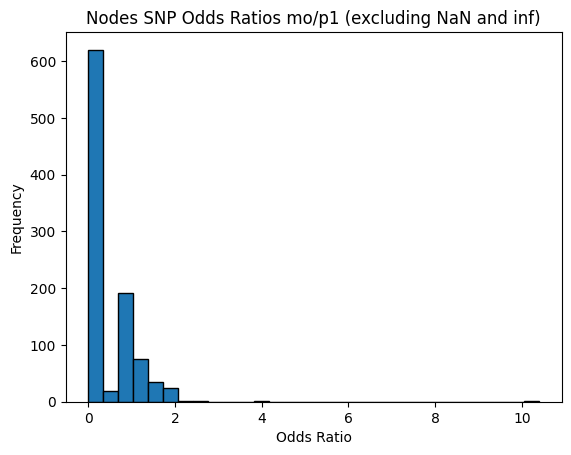

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Filter out NaN and infinite values
filtered_odds_ratios = odds_ratios_df['Odds Ratio'].replace([np.inf, -np.inf], np.nan).dropna()

# Plot the histogram
plt.hist(filtered_odds_ratios, bins=30, edgecolor='black')
plt.xlabel('Odds Ratio')
plt.ylabel('Frequency')
plt.title('Nodes SNP Odds Ratios mo/p1 (excluding NaN and inf)')
plt.show()


# p1/mo

In [26]:
import pandas as pd
import scipy.stats as stats
import numpy as np

# Step 1: Convert non-zero values to 1, keep 0 as is
df_binary = df.copy()
node_columns = [col for col in df.columns if col not in ['SFARI ID', 'Repository Id','Role','ASD']]  # Assuming all columns except 'Role' are node columns
df_binary[node_columns] = (df_binary[node_columns] > 0).astype(int)  # Convert to binary (0 or 1)

# Step 2: Calculate odds ratio for each node
odds_ratios = {}

for node in node_columns:
    # Create a contingency table for 'fa' and 'mo'
    contingency_table = pd.crosstab(df_binary['Role'], df_binary[node])

    # Check if the table has both 0 and 1 for both 'fa' and 'mo'
    if contingency_table.shape == (2, 2):
        # Calculate the odds ratio (mo/fa)
        odds_ratio, p_value = stats.fisher_exact(contingency_table, alternative='two-sided')
        
        # Avoid division by zero
        if odds_ratio == 0:
            odds_ratios[node] = np.inf  # Assign infinity if odds_ratio is zero
        else:
            odds_ratios[node] = 1 / odds_ratio  # This gives you mo/fa
    else:
        # Skip nodes where the contingency table is not 2x2
        odds_ratios[node] = None  # Or handle however you'd prefer

# Display the odds ratios
odds_ratios_df = pd.DataFrame(list(odds_ratios.items()), columns=['Node', 'Odds Ratio (mo/fa)'])
print(odds_ratios_df)


                    Node  Odds Ratio (mo/fa)
0     ENSG00000188976.11            1.018363
1      ENSG00000215790.7                 inf
2     ENSG00000157933.10                 NaN
3      ENSG00000287356.1            0.485256
4      ENSG00000197921.6            1.150129
...                  ...                 ...
1283  ENSG00000156925.12           12.905018
1284  ENSG00000013619.14            0.485256
1285  ENSG00000184216.14                 inf
1286  ENSG00000169057.23                 inf
1287  ENSG00000013563.14                 inf

[1288 rows x 2 columns]


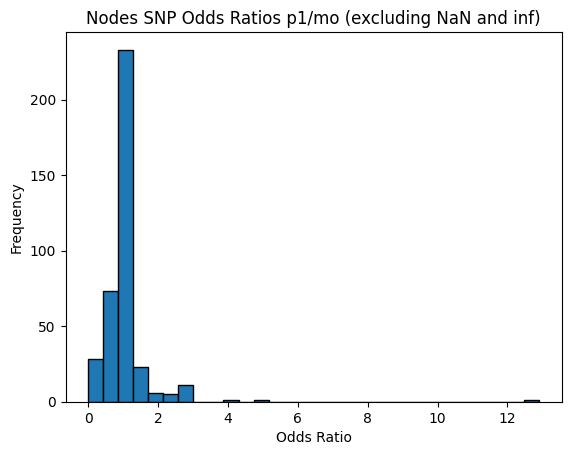

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Filter out NaN and infinite values
filtered_odds_ratios = odds_ratios_df['Odds Ratio (mo/fa)'].replace([np.inf, -np.inf], np.nan).dropna()

# Plot the histogram
plt.hist(filtered_odds_ratios, bins=30, edgecolor='black')
plt.xlabel('Odds Ratio')
plt.ylabel('Frequency')
plt.title('Nodes SNP Odds Ratios p1/mo (excluding NaN and inf)')
plt.show()


In [30]:
odds_ratios_df[(odds_ratios_df['Odds Ratio (mo/fa)'] > 2) & (odds_ratios_df['Odds Ratio (mo/fa)'] < 10)]

,Node,Odds Ratio (mo/fa)
118,ENSG00000158711.14,2.926829
130,ENSG00000172059.11,3.922481
197,ENSG00000123983.14,2.769520
280,ENSG00000242512.9,2.203428
345,ENSG00000109771.15,2.926829
430,ENSG00000007866.21,2.926829
492,ENSG00000253293.5,2.203428
688,ENSG00000059915.17,2.926829
709,ENSG00000109854.13,2.769520
846,ENSG00000092199.17,2.769520
